<a href="https://colab.research.google.com/github/Saul-Ochoa/REDESNEURONALPYTHON/blob/main/REDES_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redes LSTM**

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from keras.models import load_model
import tensorflow as tf
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

Epoch 1/100
119/119 [==============================] - 18s 102ms/step - loss: 7.4453e-05
Epoch 2/100
119/119 [==============================] - 12s 103ms/step - loss: 4.0039e-06
Epoch 3/100
119/119 [==============================] - 12s 103ms/step - loss: 3.9158e-06
Epoch 4/100
119/119 [==============================] - 12s 103ms/step - loss: 3.6437e-06
Epoch 5/100
119/119 [==============================] - 11s 96ms/step - loss: 3.6414e-06
Epoch 6/100
119/119 [==============================] - 12s 97ms/step - loss: 3.4036e-06
Epoch 7/100
119/119 [==============================] - 12s 103ms/step - loss: 3.1614e-06
Epoch 8/100
119/119 [==============================] - 13s 113ms/step - loss: 3.6265e-06
Epoch 9/100
119/119 [==============================] - 13s 111ms/step - loss: 3.1565e-06
Epoch 10/100
119/119 [==============================] - 12s 103ms/step - loss: 2.7451e-06
Epoch 11/100
119/119 [==============================] - 12s 105ms/step - loss: 3.1828e-06
Epoch 12/100
119/119 

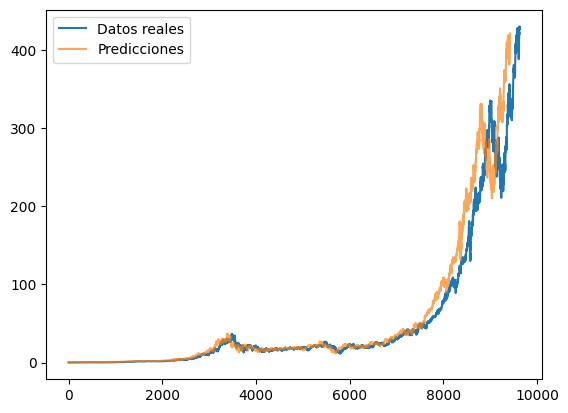

In [ ]:
# Obtener datos históricos de las acciones de Microsoft utilizando yfinance
msft = yf.Ticker("MSFT")
data = msft.history(period="max")

# Filtrando solo la columna de precios de cierre
close_prices = data['Close'].values.reshape(-1, 1)

# Normalización de los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

# División de los datos en conjuntos de entrenamiento y prueba
train_size = int(len(scaled_prices) * 0.80)
test_size = len(scaled_prices) - train_size
train_data, test_data = scaled_prices[0:train_size,:], scaled_prices[train_size:len(scaled_prices),:]

# Función para crear conjuntos de datos con secuencias temporales
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Creación de los conjuntos de datos de entrenamiento y prueba con secuencias temporales
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reformateo de los datos para que sean compatibles con LSTM (muestras, pasos de tiempo, características)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Construcción del modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

# Predicción de los precios de cierre
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertir la normalización para obtener los precios reales
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Visualización de los resultados
plt.plot(data['Close'].values, label='Datos reales')
plt.plot(np.concatenate((train_predict,test_predict)), label='Predicciones', alpha=0.7)
plt.legend()
plt.show()

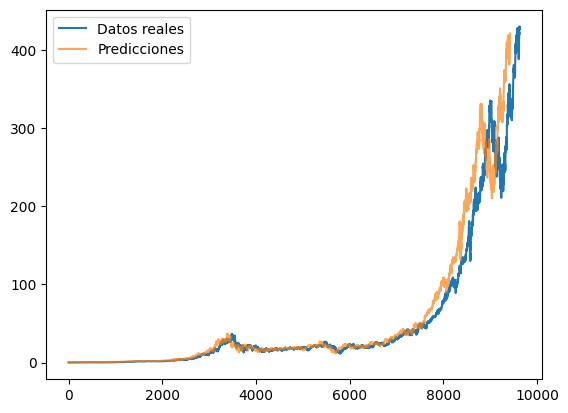

In [ ]:
# Visualización de los resultados
plt.plot(data['Close'].values, label='Datos reales')
plt.plot(np.concatenate((train_predict,test_predict)), label='Predicciones', alpha=0.7)
plt.legend()
plt.show()

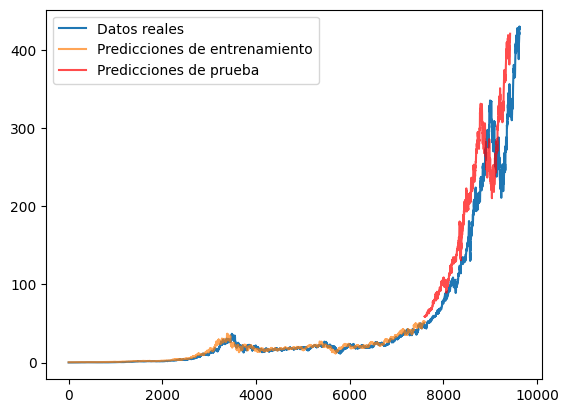

In [ ]:
# Visualización de los resultados
plt.plot(data['Close'].values, label='Datos reales')
plt.plot(train_predict, label='Predicciones de entrenamiento', alpha=0.7)  # Utiliza un color diferente para las predicciones de entrenamiento
plt.plot(range(len(train_predict), len(train_predict) + len(test_predict)), test_predict, label='Predicciones de prueba', alpha=0.7, color='red')  # Utiliza un color diferente para las predicciones de prueba
plt.legend()
plt.show()


# **Ejemplo de RNN APPLE**

In [11]:
# Obtener datos históricos de las acciones de Apple utilizando yfinance
aapl = yf.Ticker("AAPL")
data = aapl.history(start="2016-01-01")
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04 00:00:00-05:00,23.292498,23.919019,23.154028,23.914478,270597600,0.0,0.0
2016-01-05 00:00:00-05:00,24.005286,24.027986,23.247106,23.315205,223164000,0.0,0.0
2016-01-06 00:00:00-05:00,22.827151,23.238022,22.670522,22.858931,273829600,0.0,0.0
2016-01-07 00:00:00-05:00,22.400390,22.729540,21.889639,21.894178,324377600,0.0,0.0
2016-01-08 00:00:00-05:00,22.370880,22.498000,21.964549,22.009949,283192000,0.0,0.0


In [14]:
data.shape

(2113, 7)

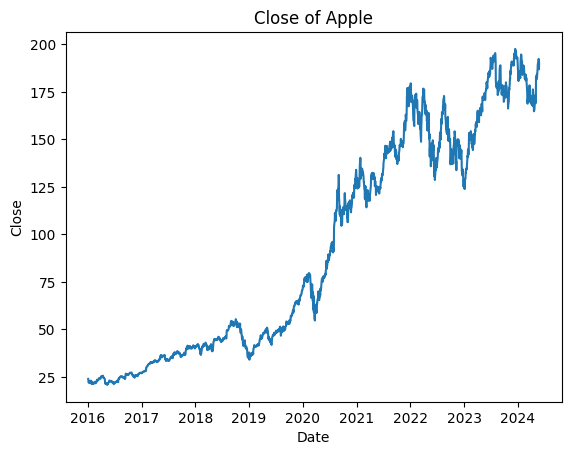

In [15]:
sns.lineplot(data=data,x=data.index,y='Close')
plt.title('Close of Apple')
plt.show()

In [27]:
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
dataset=min_max_scaler.fit_transform(data['Close'].values.reshape(-1, 1))
dataset

array([[0.01792784],
       [0.01453915],
       [0.01195908],
       ...,
       [0.96217303],
       [0.93944139],
       [0.95697076]])

In [28]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1479 634


In [30]:
print(len(data))
print(1479 + 634)

2113
2113


In [31]:
def create_dataset(dataset,look_back=15):
  dataX,dataY=[],[]
  for i in range(len(dataset)-look_back-1):
    a=dataset[i:(i+look_back),0]
    dataX.append(a)
    dataY.append(dataset[i + look_back,0])
  return np.array(dataX),np.array(dataY)

In [32]:
x_train, y_train = create_dataset(train, look_back=15)
x_test, y_test = create_dataset(test, look_back=15)

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1463, 15)
(1463,)
(618, 15)
(618,)


In [34]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [35]:
# create and fit the LSTM network
look_back = 15
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
1463/1463 - 6s - loss: 0.0015 - 6s/epoch - 4ms/step
Epoch 2/20
1463/1463 - 2s - loss: 3.8122e-04 - 2s/epoch - 2ms/step
Epoch 3/20
1463/1463 - 2s - loss: 2.8832e-04 - 2s/epoch - 2ms/step
Epoch 4/20
1463/1463 - 2s - loss: 2.4426e-04 - 2s/epoch - 2ms/step
Epoch 5/20
1463/1463 - 3s - loss: 2.0830e-04 - 3s/epoch - 2ms/step
Epoch 6/20
1463/1463 - 3s - loss: 2.1052e-04 - 3s/epoch - 2ms/step
Epoch 7/20
1463/1463 - 2s - loss: 1.9369e-04 - 2s/epoch - 2ms/step
Epoch 8/20
1463/1463 - 2s - loss: 1.7822e-04 - 2s/epoch - 2ms/step
Epoch 9/20
1463/1463 - 5s - loss: 1.7698e-04 - 5s/epoch - 3ms/step
Epoch 10/20
1463/1463 - 4s - loss: 1.5631e-04 - 4s/epoch - 2ms/step
Epoch 11/20
1463/1463 - 2s - loss: 1.5047e-04 - 2s/epoch - 2ms/step
Epoch 12/20
1463/1463 - 2s - loss: 1.5899e-04 - 2s/epoch - 2ms/step
Epoch 13/20
1463/1463 - 2s - loss: 1.4062e-04 - 2s/epoch - 2ms/step
Epoch 14/20
1463/1463 - 2s - loss: 1.5100e-04 - 2s/epoch - 2ms/step
Epoch 15/20
1463/1463 - 4s - loss: 1.5389e-04 - 4s/epoch - 2m

In [36]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


20/20 [==============================] - 0s 2ms/step
Train Score: 1.66 RMSE
Test Score: 5.64 RMSE


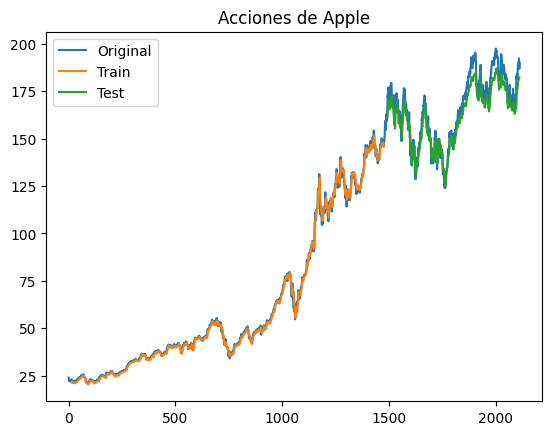

In [41]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(min_max_scaler.inverse_transform(dataset),label='Original')
plt.plot(trainPredictPlot,label='Train')
plt.plot(testPredictPlot,label='Test')
plt.title('Acciones de Apple')
plt.legend()
plt.show()